In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans # pip install scikit-learn

In [2]:
# load the excel sheet into a Dataframe
xls = pd.ExcelFile("UW_Churn_Pred_Data.xls")
print(f"Sheet Names: {xls.sheet_names}")

Sheet Names: ['Data', 'Legend', 'N10', 'B30 Pro', 'Data Before Feb 13']


In [4]:
# Load the Data Before Feb 13 sheet
data = pd.read_excel(xls, sheet_name="Data Before Feb 13")

In [5]:
# show the first 5 rows of the dataset
print(data.head())

   Device number Product/Model #     Month Office Date Office Time In  \
0      410006072             N10  December  2024-12-19       15:30:00   
1      410006130             N10       NaN         NaT            NaN   
2      410006155             N10       NaN         NaT            NaN   
3      410006171             N10       NaN         NaT            NaN   
4      410006213             N10       NaN         NaT            NaN   

       Source    Type Warranty Defect / Damage type  Responsible Party  \
0  B2C Amazon  Return      Yes            No defect  Customer: Remorse   
1         NaN     NaN      NaN                  NaN                NaN   
2         NaN     NaN      NaN                  NaN                NaN   
3         NaN     NaN      NaN                  NaN                NaN   
4         NaN     NaN      NaN                  NaN                NaN   

  Final Status  Churn                                           sim_info  \
0     Refurb B    1.0  [{"slot_index":0,

In [6]:
# Display basic info about the data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Device number         4995 non-null   int64         
 1   Product/Model #       4995 non-null   object        
 2   Month                 275 non-null    object        
 3   Office Date           275 non-null    datetime64[ns]
 4   Office Time In        275 non-null    object        
 5   Source                275 non-null    object        
 6   Type                  269 non-null    object        
 7   Warranty              264 non-null    object        
 8   Defect / Damage type  264 non-null    object        
 9   Responsible Party     264 non-null    object        
 10  Final Status          263 non-null    object        
 11  Churn                 274 non-null    float64       
 12  sim_info              4884 non-null   object        
 13  promotion_email   

In [8]:
# check for missing values
print(f"Missing Values:\n{data.isnull().sum()}")

Missing Values:
Device number              0
Product/Model #            0
Month                   4720
Office Date             4720
Office Time In          4720
Source                  4720
Type                    4726
Warranty                4731
Defect / Damage type    4731
Responsible Party       4731
Final Status            4732
Churn                   4721
sim_info                 111
promotion_email         1820
register_email           111
interval_date            111
last_boot_date           111
active_date              111
dtype: int64


It seems that there are more missing data compared to the churn flag = 0

In [9]:
# check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
categorical_features = data.select_dtypes(include=['object', 'bool']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['Product/Model #', 'Month', 'Office Time In', 'Source', 'Type', 'Warranty', 'Defect / Damage type', 'Responsible Party', 'Final Status', 'sim_info', 'interval_date', 'last_boot_date', 'active_date']
Numerical Features: ['Device number', 'Churn', 'promotion_email', 'register_email']


# Analyzing Numerical Features

In [11]:
# Summary statistics for numerical features
print("Numerical Features Summary:")
print(data.describe())

Numerical Features Summary:
       Device number          Office Date       Churn  promotion_email  \
count   4.995000e+03                  275  274.000000      3175.000000   
mean    3.722009e+08  2024-10-19 04:48:00    0.908759         0.215748   
min     3.300054e+08  2024-04-03 00:00:00    0.000000         0.000000   
25%     3.300432e+08  2024-07-15 12:00:00    1.000000         0.000000   
50%     4.100101e+08  2024-12-09 00:00:00    1.000000         0.000000   
75%     4.100461e+08  2025-01-14 00:00:00    1.000000         0.000000   
max     4.100997e+08  2025-02-13 00:00:00    1.000000         1.000000   
std     3.994723e+07                  NaN    0.288478         0.411405   

       register_email  
count     4884.000000  
mean         0.608313  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
std          0.488177  


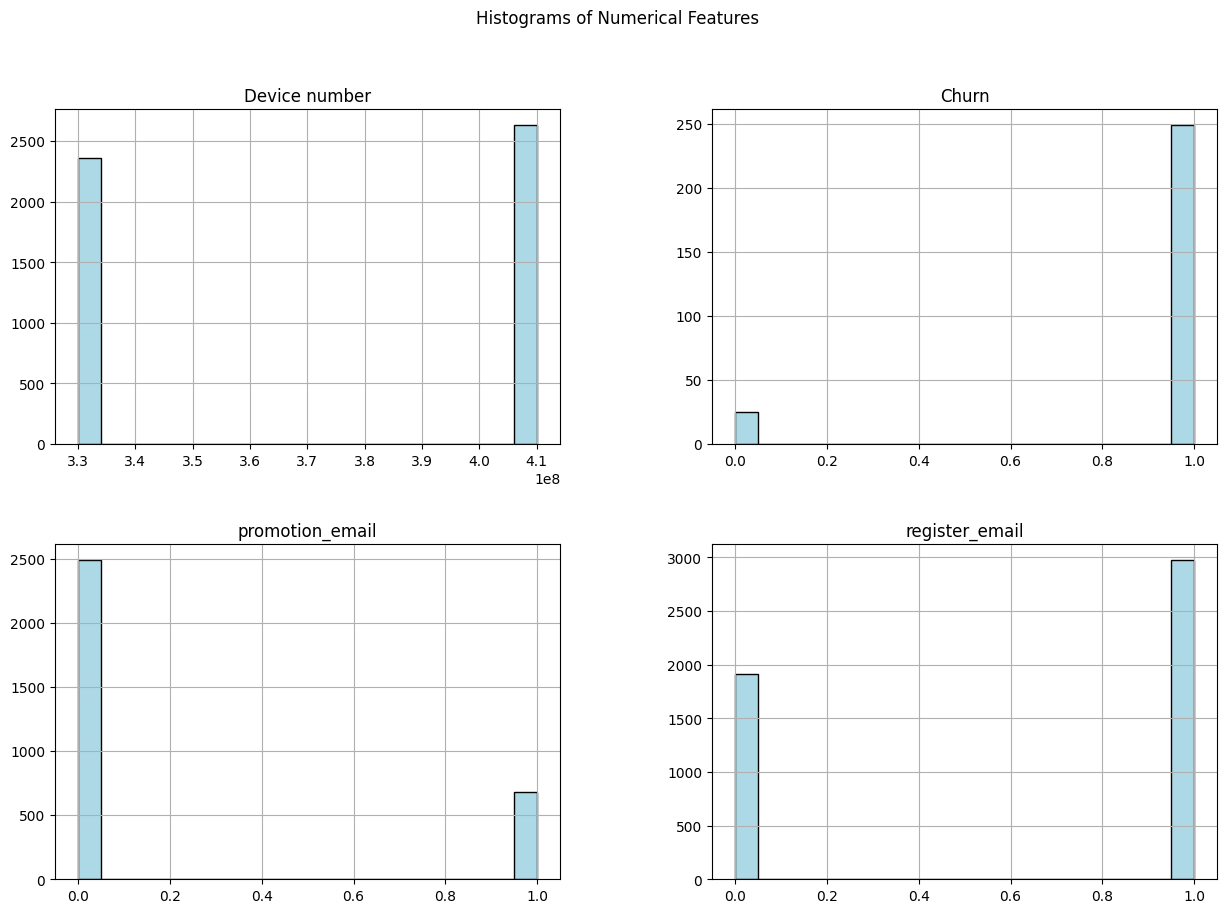

In [12]:
# Plot histograms for numerical features
data[numerical_features].hist(bins=20, figsize=(15, 10), color='lightblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

                 Device number     Churn  promotion_email  register_email
Device number         1.000000  0.277954        -0.052298       -0.477589
Churn                 0.277954  1.000000         0.058762       -0.141441
promotion_email      -0.052298  0.058762         1.000000        0.644199
register_email       -0.477589 -0.141441         0.644199        1.000000


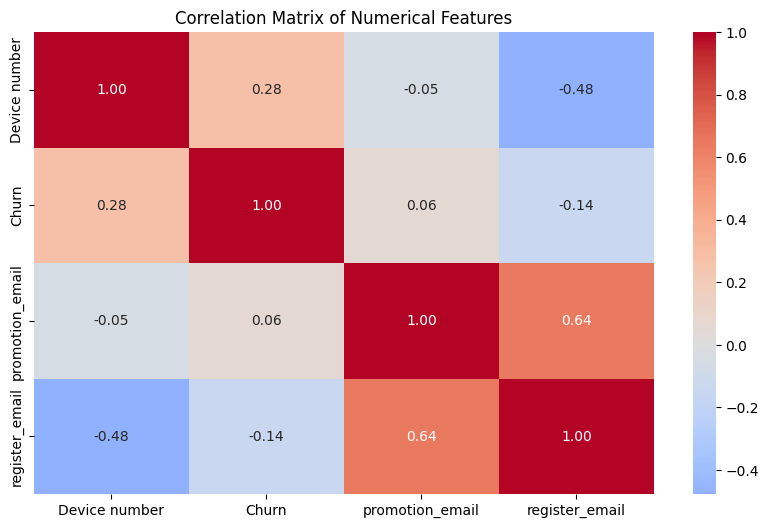

In [13]:
# correlation matrix for numerical features
corr_matrix = data[numerical_features].corr()

print(corr_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()